In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [30]:
LGR_df = pd.read_csv("../../data/salmon_data/results_ave_mae_1.csv", index_col=0)
LGR_df

,Gene,ave_MAE
0,mmp13,1.020441
1,LOC123723770,0.997749
2,fgd4a,1.005578
3,LOC106601563,1.003236
4,LOC106601071,0.977116
...,...,...
386,Random_15,0.994092
387,Random_16,1.022094
388,Random_17,1.015302
389,Random_18,1.014420


In [31]:
lgr_df_list = []
set_top_10 = set()
set_all_genes = set()
aggregate_df = pd.DataFrame()
for i in range(10):
    lgr_df = pd.read_csv(f"../../data/salmon_data/results_ave_mae_{i+1}.csv", index_col=0)
    lgr_df_list.append(lgr_df)
    top_10_df = set(lgr_df.sort_values(by="ave_MAE")["Gene"].head(10).values)
    set_top_10 = set_top_10.union(top_10_df)
    set_all_genes = set_all_genes.union(lgr_df["Gene"].values)
    aggregate_df = pd.concat([aggregate_df, lgr_df])
    #break

In [32]:
mean_df = aggregate_df.groupby("Gene").mean()
mean_df.rename(columns={"ave_MAE": "mean"}, inplace=True)
mean_df

,mean
Gene,
1433b,1.028213
143g1,1.005780
LOC100136378,1.016677
LOC100136415,1.011990
LOC100136434,1.019543
...,...
zgc:103559,1.023593
zgc:194655,1.032702
zgc:92242,1.035089


In [33]:
std_df = aggregate_df.groupby("Gene").std()
std_df.rename(columns={"ave_MAE": "std"}, inplace=True)
std_df

,std
Gene,
1433b,0.015658
143g1,0.007567
LOC100136378,NaN
LOC100136415,0.007336
LOC100136434,NaN
...,...
zgc:103559,0.010096
zgc:194655,0.012785
zgc:92242,0.010829


In [34]:
count_df = aggregate_df.groupby("Gene").count()
count_df.rename(columns={"ave_MAE": "count"}, inplace=True)
count_df

,count
Gene,
1433b,2
143g1,5
LOC100136378,1
LOC100136415,4
LOC100136434,1
...,...
zgc:103559,9
zgc:194655,6
zgc:92242,4


In [35]:
LGR_agg_df = pd.concat([mean_df, std_df, count_df], axis=1)
LGR_agg_df

,mean,std,count
Gene,,,
1433b,1.028213,0.015658,2
143g1,1.005780,0.007567,5
LOC100136378,1.016677,NaN,1
LOC100136415,1.011990,0.007336,4
LOC100136434,1.019543,NaN,1
...,...,...,...
zgc:103559,1.023593,0.010096,9
zgc:194655,1.032702,0.012785,6
zgc:92242,1.035089,0.010829,4


In [36]:
len(set_all_genes)

1432

In [37]:
len(set_top_10)

17

In [38]:
# aggregate accross runs

In [39]:
top_10_df

{'LOC106566372',
 'LOC106578021',
 'LOC106583594',
 'LOC106601072',
 'LOC106602771',
 'LOC106603702',
 'LOC106607380',
 'duox',
 'hba',
 'otub1'}

In [40]:
lgr_df_list[1]

,Gene,ave_MAE
0,LOC106578255,1.039442
1,LOC106609978,1.024372
2,LOC106601563,1.032764
3,LOC106596522,1.020894
4,LOC106590035,1.044069
...,...,...
764,Random_15,1.055095
765,Random_16,1.050612
766,Random_17,1.055571
767,Random_18,1.054867


In [41]:
GFGWA_df = pd.read_csv("../../data/GFGWA_genes_minpval.csv", index_col=0)
# GFGWA_df["minpval"] = GFGWA_df[['pval_AltGreater', 'pval_AltLess']].min(axis=1)
GFGWA_df

,minpval
143b2,0.048587
2a5e,0.000469
4f2,0.012341
5nt1a,0.060738
5ntc,0.009990
...,...
zpr1,0.000167
zranb2,0.000016
zswim7,0.000152
zswim8,0.011779


In [42]:
# Add percentiles
LGR_df["LGR_pct"] = LGR_df["ave_MAE"].rank(pct=True, ascending=False)
LGR_df.sort_values(by="LGR_pct", ascending=False, inplace=True)
LGR_df
LGR_agg_df["LGR_pct"] = LGR_agg_df["mean"].rank(pct=True, ascending=False)
LGR_agg_df.sort_values(by="LGR_pct", ascending=False, inplace=True)
LGR_agg_df.head(10)

,mean,std,count,LGR_pct
Gene,,,,
LOC106566372,0.970102,0.006391,10,1.000000
hba,0.971321,0.008957,10,0.999302
LOC106607380,0.974992,0.010902,10,0.998603
duox,0.978879,0.006727,10,0.997905
LOC106601072,0.982234,0.010190,10,0.997207
LOC106578021,0.983076,0.005382,10,0.996508
LOC106583594,0.984803,0.006695,10,0.995810
LOC106602771,0.985106,0.006386,10,0.995112
LOC106576057,0.985859,0.009726,6,0.994413


In [43]:
# LGR_agg_df.head(10).to_csv("top10.csv")

In [44]:
GFGWA_df["GFGWA_pct"] = GFGWA_df["minpval"].rank(pct=True, ascending=False)
GFGWA_df.sort_values(by="GFGWA_pct", ascending=False, inplace=True)
GFGWA_df

,minpval,GFGWA_pct
LOC106590443,4.960956e-14,1.000000
utrn,7.269689e-14,0.999959
hsd17b10,9.798417e-14,0.999918
LOC106571044,1.834140e-13,0.999877
gfra4b,2.892599e-13,0.999836
...,...,...
txndc17,4.980976e-01,0.000185
tirap,4.980976e-01,0.000185
rhno1,4.981365e-01,0.000123
LOC100286437,4.994315e-01,0.000082


In [45]:
combined_df = pd.merge(left=GFGWA_df, left_on=GFGWA_df.index, right=LGR_df, right_on=LGR_df["Gene"])
#combined_df = pd.merge(left=GFGWA_df, left_on=GFGWA_df.index, right=LGR_agg_df, right_on=LGR_agg_df.index)
combined_df

,key_0,minpval,GFGWA_pct,Gene,ave_MAE,LGR_pct
0,pnp4b,4.589157e-10,0.979369,pnp4b,1.018978,0.048593
1,LOC106589940,5.048503e-10,0.978959,LOC106589940,0.991797,0.884910
2,myo9ab,7.537091e-10,0.975637,myo9ab,1.008827,0.496164
3,LOC106565572,9.272353e-10,0.973812,LOC106565572,1.008553,0.511509
4,LOC106565341,9.337759e-10,0.973709,LOC106565341,1.002764,0.693095
...,...,...,...,...,...,...
169,fzd8a,4.086577e-01,0.005496,fzd8a,0.987576,0.930946
170,LOC106577994,4.088536e-01,0.005455,LOC106577994,1.010255,0.437340
171,LOC106582964,4.469041e-01,0.002953,LOC106582964,1.011123,0.381074
172,LOC106563358,4.575629e-01,0.002420,LOC106563358,1.001791,0.710997


In [46]:
combined_df["mean_PCT_score"] = (combined_df["GFGWA_pct"] + combined_df["LGR_pct"])/2

In [47]:
combined_df["pct_product"] = combined_df["GFGWA_pct"] * combined_df["LGR_pct"]

In [52]:
combined_df_display = combined_df#.drop('key_0', axis=1)
combined_df_display.rename(columns={'minpval': 'GFGWA_pval'})
combined_df_display.sort_values(by="mean_PCT_score", ascending=False).head(10)


,key_0,minpval,GFGWA_pct,Gene,ave_MAE,LGR_pct,mean_PCT_score,pct_product
9,si:ch211-106h4.4,1.672437e-08,0.942086,si:ch211-106h4.4,0.985567,0.936061,0.939074,0.881850
1,LOC106589940,5.048503e-10,0.978959,LOC106589940,0.991797,0.884910,0.931935,0.866291
21,LOC106602771,1.238417e-06,0.833969,LOC106602771,0.979385,0.966752,0.900360,0.806241
13,LOC106581305,9.252821e-08,0.910996,LOC106581305,0.995344,0.836317,0.873657,0.761882
32,LOC106575107,5.766602e-06,0.773430,LOC106575107,0.984489,0.946292,0.859861,0.731890
6,LOC100196779,5.400605e-09,0.957467,LOC100196779,0.999756,0.754476,0.855971,0.722385
19,LOC106564502,8.933971e-07,0.845700,LOC106564502,0.993793,0.861893,0.853796,0.728902
4,LOC106565341,9.337759e-10,0.973709,LOC106565341,1.002764,0.693095,0.833402,0.674873
30,LOC106588296,4.814967e-06,0.780608,LOC106588296,0.992685,0.877238,0.828923,0.684779
10,rgcc,2.377099e-08,0.936590,rgcc,1.001582,0.716113,0.826351,0.670704


In [24]:
combined_df_display["LGR_rank"] = combined_df_display["LGR_pct"].rank(ascending=False)
combined_df_display["GFGWA_rank"] = combined_df_display["GFGWA_pct"].rank(ascending=False)
top=combined_df_display[combined_df_display["LGR_rank"] <= 20]
top[["key_0", "LGR_rank", "GFGWA_rank"]].sort_values(by="GFGWA_rank").head(5)

,key_0,LGR_rank,GFGWA_rank
9,si:ch211-106h4.4,10.0,10.0
21,LOC106602771,5.0,22.0
32,LOC106575107,7.0,33.0
41,LOC106571461,19.0,42.0
53,gfpt1,8.0,54.0


In [25]:
combined_df_display["LGR_rank"] = combined_df_display["LGR_pct"].rank(ascending=False)
combined_df_display["GFGWA_rank"] = combined_df_display["GFGWA_pct"].rank(ascending=False)
top = combined_df_display[combined_df_display["GFGWA_rank"] <= 20]
top[["key_0", "LGR_rank", "GFGWA_rank"]].sort_values(by="LGR_rank").head(5)

,key_0,LGR_rank,GFGWA_rank
9,si:ch211-106h4.4,10.0,10.0
1,LOC106589940,21.0,2.0
19,LOC106564502,30.0,20.0
13,LOC106581305,34.0,14.0
6,LOC100196779,51.0,7.0


In [26]:
gfgwa_weight = 0.5
lgr_weight = 1-gfgwa_weight
# combined_df_display["weighted_pct_product"] = (gfgwa_weight * combined_df_display["GFGWA_pct"]) * (lgr_weight * combined_df_display["LGR_pct"])
combined_df_display["weighted_pct_mean"] = (gfgwa_weight * combined_df_display["GFGWA_pct"]) + (lgr_weight * combined_df_display["LGR_pct"])/2
combined_df_display["weighted_pct_mean_rank"] = combined_df_display["weighted_pct_mean"].rank(ascending=False)
combined_df_display["mean_pct_rank"] = combined_df_display["mean_PCT_score"].rank(ascending=False)
combined_df_display["product_pct_rank"] = combined_df_display["pct_product"].rank(ascending=False)
combined_df_display["weighted_mean_pct_rank"] = combined_df_display["weighted_pct_mean"].rank(ascending=False)
combined_df_display.sort_values(by="pct_product", ascending=False, inplace=True)
combined_df_display[["key_0","mean_PCT_score", "product_pct_rank", "mean_pct_rank", "weighted_mean_pct_rank", "GFGWA_pct", "LGR_pct", "mean_PCT_score", "weighted_pct_mean"]].head(10)

,key_0,mean_PCT_score,product_pct_rank,mean_pct_rank,weighted_mean_pct_rank,GFGWA_pct,LGR_pct,mean_PCT_score,weighted_pct_mean
9,si:ch211-106h4.4,0.939074,1.0,1.0,2.0,0.942086,0.936061,0.939074,0.705058
1,LOC106589940,0.931935,2.0,2.0,1.0,0.978959,0.884910,0.931935,0.710707
21,LOC106602771,0.900360,3.0,3.0,6.0,0.833969,0.966752,0.900360,0.658673
13,LOC106581305,0.873657,4.0,4.0,4.0,0.910996,0.836317,0.873657,0.664577
32,LOC106575107,0.859861,5.0,5.0,11.0,0.773430,0.946292,0.859861,0.623288
19,LOC106564502,0.853796,6.0,7.0,8.0,0.845700,0.861893,0.853796,0.638323
6,LOC100196779,0.855971,7.0,6.0,3.0,0.957467,0.754476,0.855971,0.667352
30,LOC106588296,0.828923,8.0,9.0,14.0,0.780608,0.877238,0.828923,0.609613
4,LOC106565341,0.833402,9.0,8.0,5.0,0.973709,0.693095,0.833402,0.660128
10,rgcc,0.826351,10.0,10.0,7.0,0.936590,0.716113,0.826351,0.647323


In [25]:
len(set(combined_df_display.head(10)["weighted_mean_pct_rank"].values).intersection(set({1,2,3,4,5,6,7,8,9,10})))

8

In [26]:
np.linspace(0,1,100)

array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747

In [27]:
weighted_top10_in_mean_top10 = []

for gfgwa_weight in np.linspace(0,1,1000):

    #gfgwa_weight = 0.5
    lgr_weight = 1-gfgwa_weight
    combined_df_display["weighted_pct_mean"] =((gfgwa_weight * combined_df_display["GFGWA_pct"]) + (lgr_weight * combined_df_display["LGR_pct"]))/2
    combined_df_display["mean_PCT_score"] = ((combined_df_display["GFGWA_pct"]) + (combined_df_display["LGR_pct"]))/2
    combined_df_display["mean_pct_rank"] = combined_df_display["mean_PCT_score"].rank(ascending=False)
    combined_df_display["weighted_mean_pct_rank"] = combined_df_display["weighted_pct_mean"].rank(ascending=False)
    combined_df_display.sort_values(by="mean_PCT_score", ascending=False, inplace=True)
    combined_df_display[["key_0","mean_PCT_score", "product_pct_rank", "mean_pct_rank", "weighted_mean_pct_rank", "GFGWA_pct", "LGR_pct", "mean_PCT_score", "pct_product"]].head(10)
    number_in_both = len(set(combined_df_display.head(10)["weighted_mean_pct_rank"].values).intersection(set({1,2,3,4,5,6,7,8,9,10})))
    weighted_top10_in_mean_top10.append(number_in_both)
    #break


In [28]:
combined_df_display[["key_0","mean_PCT_score", "mean_pct_rank", "weighted_mean_pct_rank", "weighted_pct_mean", "GFGWA_pct", "LGR_pct",]].head(10)

,key_0,mean_PCT_score,mean_pct_rank,weighted_mean_pct_rank,weighted_pct_mean,GFGWA_pct,LGR_pct
27,LOC106609359,0.972110,1.0,28.0,0.485809,0.971617,0.972603
20,LOC106589940,0.967219,2.0,21.0,0.489480,0.978959,0.955479
31,LOC106601015,0.965835,3.0,32.0,0.482958,0.965916,0.965753
52,si:ch211-106h4.4,0.964536,4.0,53.0,0.471043,0.942086,0.986986
38,LOC100196779,0.940720,5.0,39.0,0.478733,0.957467,0.923973
25,LOC106565341,0.932402,6.0,26.0,0.486855,0.973709,0.891096
23,LOC106606324,0.927743,7.0,24.0,0.487675,0.975350,0.880137
79,LOC106575165,0.925472,8.0,80.0,0.454924,0.909848,0.941096
57,pdpk1a,0.923022,9.0,58.0,0.467885,0.935770,0.910274
33,LOC106610223,0.918570,10.0,34.0,0.481584,0.963168,0.873973


Text(0.5, 1.0, 'Using mean')

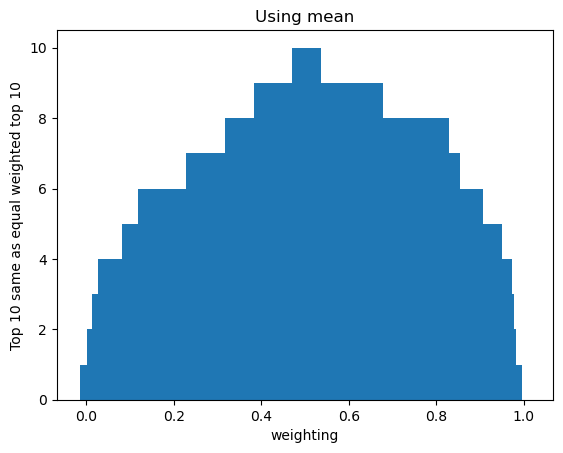

In [29]:
plt.bar(x = np.linspace(0,1,1000), height = weighted_top10_in_mean_top10, width=0.03)
plt.ylabel("Top 10 same as equal weighted top 10")
plt.xlabel("weighting")
plt.title("Using mean")

In [30]:
weighted_top10_in_product_top10 = []

for epsilon in  np.linspace(-1,1,1000):

    #gfgwa_weight = 0.5
    #lgr_weight = 1-gfgwa_weight
    # combined_df_display["weighted_pct_product"] = (gfgwa_weight * combined_df_display["GFGWA_pct"]) * (lgr_weight * combined_df_display["LGR_pct"])
    combined_df_display["weighted_pct_product"] = (combined_df_display["GFGWA_pct"]**(1+epsilon)) * (combined_df_display["LGR_pct"]**(1-epsilon))
    # combined_df_display["weighted_pct_mean_rank"] = combined_df_display["weighted_pct_mean"].rank(ascending=False)
    # combined_df_display["mean_pct_rank"] = combined_df_display["mean_PCT_score"].rank(ascending=False)
    combined_df_display["product_pct_rank"] = combined_df_display["pct_product"].rank(ascending=False)
    # combined_df_display["weighted_mean_pct_rank"] = combined_df_display["weighted_pct_mean"].rank(ascending=False)
    combined_df_display["weighted_product_pct_rank"] = combined_df_display["weighted_pct_product"].rank(ascending=False)
    combined_df_display.sort_values(by="pct_product", ascending=False, inplace=True)
    combined_df_display[["key_0","mean_PCT_score", "product_pct_rank", "mean_pct_rank", "weighted_mean_pct_rank", "GFGWA_pct", "LGR_pct", "mean_PCT_score", "pct_product"]].head(10)
    number_in_both = len(set(combined_df_display.head(10)["weighted_product_pct_rank"].values).intersection(set({1,2,3,4,5,6,7,8,9,10})))
    weighted_top10_in_product_top10.append(number_in_both)

In [31]:
combined_df_display[["key_0","mean_PCT_score", "product_pct_rank", "mean_pct_rank", "weighted_product_pct_rank", "GFGWA_pct", "LGR_pct", "mean_PCT_score", "pct_product"]].head(10)

,key_0,mean_PCT_score,product_pct_rank,mean_pct_rank,weighted_product_pct_rank,GFGWA_pct,LGR_pct,mean_PCT_score,pct_product
27,LOC106609359,0.972110,1.0,1.0,28.0,0.971617,0.972603,0.972110,0.944998
20,LOC106589940,0.967219,2.0,2.0,21.0,0.978959,0.955479,0.967219,0.935375
31,LOC106601015,0.965835,3.0,3.0,32.0,0.965916,0.965753,0.965835,0.932837
52,si:ch211-106h4.4,0.964536,4.0,4.0,53.0,0.942086,0.986986,0.964536,0.929826
38,LOC100196779,0.940720,5.0,5.0,39.0,0.957467,0.923973,0.940720,0.884673
25,LOC106565341,0.932402,6.0,6.0,26.0,0.973709,0.891096,0.932402,0.867668
23,LOC106606324,0.927743,7.0,7.0,24.0,0.975350,0.880137,0.927743,0.858441
79,LOC106575165,0.925472,8.0,8.0,80.0,0.909848,0.941096,0.925472,0.856254
57,pdpk1a,0.923022,9.0,9.0,58.0,0.935770,0.910274,0.923022,0.851807
33,LOC106610223,0.918570,10.0,10.0,34.0,0.963168,0.873973,0.918570,0.841782


Text(0.5, 1.0, 'Using product')

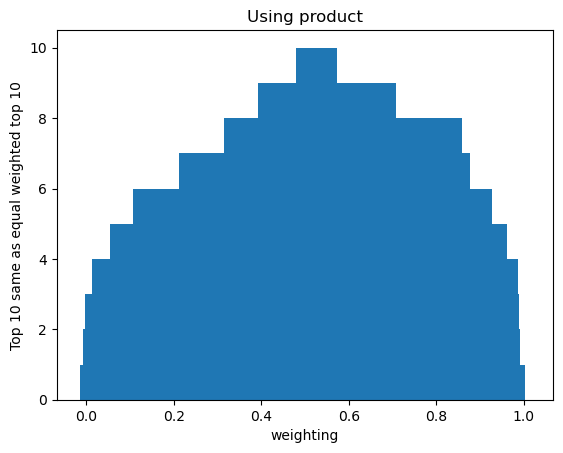

In [32]:
plt.bar(x = np.linspace(0,1,1000), height = weighted_top10_in_product_top10, width=0.03)
plt.ylabel("Top 10 same as equal weighted top 10")
plt.xlabel("weighting")
plt.title("Using product")

In [33]:
print("Using mean: mean, std", np.mean(weighted_top10_in_mean_top10), np.round(np.std(weighted_top10_in_mean_top10),3))
print("Using product: mean, std", np.mean(weighted_top10_in_product_top10), np.round(np.std(weighted_top10_in_product_top10),3))

Using mean: mean, std 6.756 2.318
Using product: mean, std 7.028 2.138


In [34]:
combined_df_display[["key_0","mean_PCT_score", "weighted_product_pct_rank", "mean_pct_rank", "weighted_mean_pct_rank", "GFGWA_pct", "LGR_pct", "mean_PCT_score", "pct_product"]].head(10)

,key_0,mean_PCT_score,weighted_product_pct_rank,mean_pct_rank,weighted_mean_pct_rank,GFGWA_pct,LGR_pct,mean_PCT_score,pct_product
27,LOC106609359,0.972110,28.0,1.0,28.0,0.971617,0.972603,0.972110,0.944998
20,LOC106589940,0.967219,21.0,2.0,21.0,0.978959,0.955479,0.967219,0.935375
31,LOC106601015,0.965835,32.0,3.0,32.0,0.965916,0.965753,0.965835,0.932837
52,si:ch211-106h4.4,0.964536,53.0,4.0,53.0,0.942086,0.986986,0.964536,0.929826
38,LOC100196779,0.940720,39.0,5.0,39.0,0.957467,0.923973,0.940720,0.884673
25,LOC106565341,0.932402,26.0,6.0,26.0,0.973709,0.891096,0.932402,0.867668
23,LOC106606324,0.927743,24.0,7.0,24.0,0.975350,0.880137,0.927743,0.858441
79,LOC106575165,0.925472,80.0,8.0,80.0,0.909848,0.941096,0.925472,0.856254
57,pdpk1a,0.923022,58.0,9.0,58.0,0.935770,0.910274,0.923022,0.851807
33,LOC106610223,0.918570,34.0,10.0,34.0,0.963168,0.873973,0.918570,0.841782


In [35]:
combined_df["logminpval"] = -np.log10(combined_df["minpval"] )
combined_df

,key_0,minpval,GFGWA_pct,mean,std,count,LGR_pct,mean_PCT_score,pct_product,LGR_rank,GFGWA_rank,weighted_pct_mean,weighted_pct_mean_rank,mean_pct_rank,product_pct_rank,weighted_mean_pct_rank,weighted_pct_product,weighted_product_pct_rank,logminpval
27,LOC106609359,1.240690e-09,0.971617,1.001839,0.009618,9,0.972603,0.972110,0.944998,18.0,28.0,0.485809,1.0,1.0,1.0,28.0,0.944040,28.0,8.906337
20,LOC106589940,5.048503e-10,0.978959,1.006512,0.010089,6,0.955479,0.967219,0.935375,35.0,21.0,0.489480,2.0,2.0,2.0,21.0,0.958361,21.0,9.296837
31,LOC106601015,2.349724e-09,0.965916,1.003830,0.007900,7,0.965753,0.965835,0.932837,27.0,32.0,0.482958,3.0,3.0,3.0,32.0,0.932994,32.0,8.628983
52,si:ch211-106h4.4,1.672437e-08,0.942086,0.996458,0.007299,10,0.986986,0.964536,0.929826,8.0,53.0,0.471043,4.0,4.0,4.0,53.0,0.887526,53.0,7.776650
38,LOC100196779,5.400605e-09,0.957467,1.012023,0.009096,10,0.923973,0.940720,0.884673,59.0,39.0,0.478733,5.0,5.0,5.0,39.0,0.916743,39.0,8.267558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,sod1,3.201017e-05,0.687626,1.059862,NaN,1,0.001370,0.344498,0.000942,846.0,267.0,0.343813,478.0,672.0,843.0,267.0,0.472829,267.0,4.494712
792,trmt61b,1.233897e-01,0.058365,1.055236,NaN,1,0.014384,0.036374,0.000839,837.0,793.0,0.029183,845.0,846.0,844.0,793.0,0.003406,793.0,0.908721
846,LOC106573104,4.773030e-01,0.001148,1.025394,0.011457,10,0.719178,0.360163,0.000826,244.0,847.0,0.000574,745.0,649.0,845.0,847.0,0.000001,847.0,0.321206
21,kcd17,5.306863e-10,0.978631,1.059947,NaN,1,0.000685,0.489658,0.000670,847.0,22.0,0.489315,234.0,446.0,846.0,22.0,0.957718,22.0,9.275162


In [36]:
pvalthreshold = -np.log10(0.05 )
pvalthreshold

1.3010299956639813

In [37]:
priority = combined_df[combined_df["LGR_pct"] < 0.05]
priority = priority[priority["minpval"] < 0.05]
priority

,key_0,minpval,GFGWA_pct,mean,std,count,LGR_pct,mean_PCT_score,pct_product,LGR_rank,GFGWA_rank,weighted_pct_mean,weighted_pct_mean_rank,mean_pct_rank,product_pct_rank,weighted_mean_pct_rank,weighted_pct_product,weighted_product_pct_rank,logminpval
32,LOC106580487,2.710464e-09,0.965055,1.050483,NaN,1,0.043151,0.504103,0.041643,810.0,33.0,0.482527,224.0,418.0,696.0,33.0,0.931331,33.0,8.566956
183,LOC106613511,4.548340e-06,0.783233,1.050289,NaN,1,0.044521,0.413877,0.034870,808.0,184.0,0.391616,377.0,576.0,715.0,184.0,0.613454,184.0,5.342147
162,LOC106585130,2.877315e-06,0.802797,1.050583,NaN,1,0.041781,0.422289,0.033542,812.0,163.0,0.401399,356.0,559.0,718.0,163.0,0.644483,163.0,5.541013
145,LOC106607459,1.843587e-06,0.819983,1.050757,NaN,1,0.040411,0.430197,0.033136,814.0,146.0,0.409991,340.0,540.0,719.0,146.0,0.672372,146.0,5.734336
192,LOC100196824,5.790736e-06,0.773061,1.050657,NaN,1,0.041096,0.407078,0.031770,813.0,193.0,0.386530,391.0,586.0,721.0,193.0,0.597623,193.0,5.237266
306,LOC106577507,7.748825e-05,0.635741,1.050205,NaN,1,0.047945,0.341843,0.030481,805.0,307.0,0.317870,509.0,673.0,730.0,307.0,0.404167,307.0,4.110764
252,LOC106560642,2.222331e-05,0.707477,1.051309,NaN,1,0.036986,0.372232,0.026167,819.0,253.0,0.353739,448.0,631.0,746.0,253.0,0.500524,253.0,4.653191
291,tgm2,5.990882e-05,0.651942,1.050827,NaN,1,0.039726,0.345834,0.025899,815.0,292.0,0.325971,498.0,668.0,748.0,292.0,0.425028,292.0,4.222509
194,LOC106603518,6.394836e-06,0.768795,1.052771,NaN,1,0.026712,0.397754,0.020536,826.0,195.0,0.384398,399.0,598.0,761.0,195.0,0.591046,195.0,5.194171
293,LOC106568442,6.064632e-05,0.651204,1.051825,NaN,1,0.031507,0.341355,0.020517,822.0,294.0,0.325602,500.0,675.0,762.0,294.0,0.424066,294.0,4.217196


In [38]:
priority_list = list(priority["key_0"].unique())
priority_list

['LOC106580487',
 'LOC106613511',
 'LOC106585130',
 'LOC106607459',
 'LOC100196824',
 'LOC106577507',
 'LOC106560642',
 'tgm2',
 'LOC106603518',
 'LOC106568442',
 'LOC106611719',
 'LOC106587394',
 'asal',
 'LOC106588846',
 'LOC106563565',
 'tnfsf14',
 'LOC106583798',
 'LOC106582667',
 'si:ch73-390b10.2',
 'smyd3',
 'LOC106578379',
 'il17d',
 'LOC106587467',
 'htra1b',
 'cubn',
 'LOC106584338',
 'LOC106582900',
 'rasgrp2',
 'LOC106607746',
 'atp1b1a',
 'LOC106568894',
 'LOC100195531',
 'gp132',
 'c209d',
 'LOC106601138',
 'b3galnt2',
 'sod1',
 'kcd17']

In [39]:
combined_df_without_priority = combined_df[~combined_df["key_0"].isin(priority_list)]
combined_df_without_priority

,key_0,minpval,GFGWA_pct,mean,std,count,LGR_pct,mean_PCT_score,pct_product,LGR_rank,GFGWA_rank,weighted_pct_mean,weighted_pct_mean_rank,mean_pct_rank,product_pct_rank,weighted_mean_pct_rank,weighted_pct_product,weighted_product_pct_rank,logminpval
27,LOC106609359,1.240690e-09,0.971617,1.001839,0.009618,9,0.972603,0.972110,0.944998,18.0,28.0,0.485809,1.0,1.0,1.0,28.0,0.944040,28.0,8.906337
20,LOC106589940,5.048503e-10,0.978959,1.006512,0.010089,6,0.955479,0.967219,0.935375,35.0,21.0,0.489480,2.0,2.0,2.0,21.0,0.958361,21.0,9.296837
31,LOC106601015,2.349724e-09,0.965916,1.003830,0.007900,7,0.965753,0.965835,0.932837,27.0,32.0,0.482958,3.0,3.0,3.0,32.0,0.932994,32.0,8.628983
52,si:ch211-106h4.4,1.672437e-08,0.942086,0.996458,0.007299,10,0.986986,0.964536,0.929826,8.0,53.0,0.471043,4.0,4.0,4.0,53.0,0.887526,53.0,7.776650
38,LOC100196779,5.400605e-09,0.957467,1.012023,0.009096,10,0.923973,0.940720,0.884673,59.0,39.0,0.478733,5.0,5.0,5.0,39.0,0.916743,39.0,8.267558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,LOC106579522,7.353987e-02,0.088963,1.053370,NaN,1,0.022603,0.055783,0.002011,829.0,768.0,0.044481,838.0,841.0,839.0,768.0,0.007914,768.0,1.133477
827,LOC106600142,2.755893e-01,0.019318,1.048173,NaN,1,0.068493,0.043906,0.001323,788.0,828.0,0.009659,846.0,845.0,842.0,828.0,0.000373,828.0,0.559738
792,trmt61b,1.233897e-01,0.058365,1.055236,NaN,1,0.014384,0.036374,0.000839,837.0,793.0,0.029183,845.0,846.0,844.0,793.0,0.003406,793.0,0.908721
846,LOC106573104,4.773030e-01,0.001148,1.025394,0.011457,10,0.719178,0.360163,0.000826,244.0,847.0,0.000574,745.0,649.0,845.0,847.0,0.000001,847.0,0.321206


In [40]:
combined_priority_only = combined_df[combined_df["key_0"].isin(priority_list)]
combined_priority_only

,key_0,minpval,GFGWA_pct,mean,std,count,LGR_pct,mean_PCT_score,pct_product,LGR_rank,GFGWA_rank,weighted_pct_mean,weighted_pct_mean_rank,mean_pct_rank,product_pct_rank,weighted_mean_pct_rank,weighted_pct_product,weighted_product_pct_rank,logminpval
32,LOC106580487,2.710464e-09,0.965055,1.050483,NaN,1,0.043151,0.504103,0.041643,810.0,33.0,0.482527,224.0,418.0,696.0,33.0,0.931331,33.0,8.566956
183,LOC106613511,4.548340e-06,0.783233,1.050289,NaN,1,0.044521,0.413877,0.034870,808.0,184.0,0.391616,377.0,576.0,715.0,184.0,0.613454,184.0,5.342147
162,LOC106585130,2.877315e-06,0.802797,1.050583,NaN,1,0.041781,0.422289,0.033542,812.0,163.0,0.401399,356.0,559.0,718.0,163.0,0.644483,163.0,5.541013
145,LOC106607459,1.843587e-06,0.819983,1.050757,NaN,1,0.040411,0.430197,0.033136,814.0,146.0,0.409991,340.0,540.0,719.0,146.0,0.672372,146.0,5.734336
192,LOC100196824,5.790736e-06,0.773061,1.050657,NaN,1,0.041096,0.407078,0.031770,813.0,193.0,0.386530,391.0,586.0,721.0,193.0,0.597623,193.0,5.237266
306,LOC106577507,7.748825e-05,0.635741,1.050205,NaN,1,0.047945,0.341843,0.030481,805.0,307.0,0.317870,509.0,673.0,730.0,307.0,0.404167,307.0,4.110764
252,LOC106560642,2.222331e-05,0.707477,1.051309,NaN,1,0.036986,0.372232,0.026167,819.0,253.0,0.353739,448.0,631.0,746.0,253.0,0.500524,253.0,4.653191
291,tgm2,5.990882e-05,0.651942,1.050827,NaN,1,0.039726,0.345834,0.025899,815.0,292.0,0.325971,498.0,668.0,748.0,292.0,0.425028,292.0,4.222509
194,LOC106603518,6.394836e-06,0.768795,1.052771,NaN,1,0.026712,0.397754,0.020536,826.0,195.0,0.384398,399.0,598.0,761.0,195.0,0.591046,195.0,5.194171
293,LOC106568442,6.064632e-05,0.651204,1.051825,NaN,1,0.031507,0.341355,0.020517,822.0,294.0,0.325602,500.0,675.0,762.0,294.0,0.424066,294.0,4.217196


In [41]:
light_green = (0.0, 0.6, 0.5)
pink = (1, 0.078, 0.576)

In [42]:
combined_priority_only.iloc[0]["Gene"]

KeyError: 'Gene'

In [ ]:
combined_priority_only.reset_index(drop=True, inplace=True)

In [ ]:
combined_priority_only.reset_index(inplace=True) # create index column for plot

In [ ]:
combined_priority_only

,index,key_0,minpval,GFGWA_pct,Gene,ave_MAE,LGR_pct,mean_PCT_score,logminpval
0,0,LOC106586691,3.210755e-10,0.981748,LOC106586691,1.042055,0.027143,0.504445,9.493393
1,1,LOC106569162,9.567277e-06,0.749641,LOC106569162,1.042504,0.020000,0.384821,5.019212
2,2,trip6,5.078375e-04,0.496288,trip6,1.042317,0.024286,0.260287,3.294275
3,3,LOC100194731,5.456883e-04,0.490915,LOC100194731,1.041418,0.040000,0.265458,3.263055
4,4,LOC106587884,7.082421e-04,0.471433,LOC106587884,1.042354,0.022857,0.247145,3.149818
5,5,LOC106590330,9.897101e-04,0.444075,LOC106590330,1.041627,0.034286,0.239181,3.004492
6,6,LOC106580654,2.136709e-03,0.379025,LOC106580654,1.042038,0.028571,0.203798,2.670255
7,7,hce1,2.072064e-02,0.186539,hce1,1.041123,0.044286,0.115412,1.683597
8,8,LOC106569170,2.295223e-02,0.177843,LOC106569170,1.042980,0.010000,0.093922,1.639175
9,9,LOC100196094,2.914254e-02,0.159509,LOC100196094,1.042534,0.017143,0.088326,1.535473


In [ ]:
combined_priority_only.iloc[5]

index                        5
key_0             LOC106590330
minpval                0.00099
GFGWA_pct             0.444075
Gene              LOC106590330
ave_MAE               1.041627
LGR_pct               0.034286
mean_PCT_score        0.239181
logminpval            3.004492
Name: 5, dtype: object

/tmp/ipykernel_2638315/2470764992.py:5: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x = combined_priority_only["logminpval"],


Text(0, 0.5, 'LGR percentile')

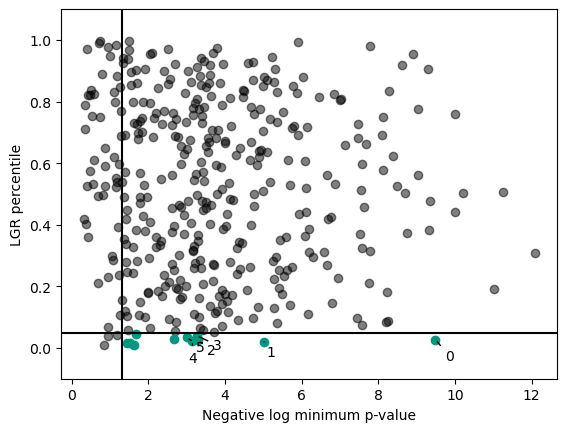

In [ ]:
plt.scatter(x = combined_df_without_priority["logminpval"], 
            y = combined_df_without_priority["LGR_pct"],
            c='k',
            alpha=0.5)
plt.scatter(x = combined_priority_only["logminpval"], 
            y = combined_priority_only["LGR_pct"],
            c=light_green,
            alpha=1)
plt.axvline(x=pvalthreshold, c='k')
plt.axhline(y=0.05, c='k')
plt.ylim(-.1, 1.1)
plt.annotate(combined_priority_only.iloc[0]["index"], 
             (combined_priority_only.iloc[0]["logminpval"], 
              combined_priority_only.iloc[0]["LGR_pct"]), 
              textcoords="offset points", xytext=(10,-15), 
              ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3"))

plt.annotate(combined_priority_only.iloc[1]["index"], 
             (combined_priority_only.iloc[1]["logminpval"], 
              combined_priority_only.iloc[1]["LGR_pct"]), 
              textcoords="offset points", xytext=(5,-10), 
              ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3"))

plt.annotate(combined_priority_only.iloc[2]["index"], 
             (combined_priority_only.iloc[2]["logminpval"], 
              combined_priority_only.iloc[2]["LGR_pct"]), 
              textcoords="offset points", xytext=(10,-10), 
              ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3"))

plt.annotate(combined_priority_only.iloc[3]["index"], 
             (combined_priority_only.iloc[3]["logminpval"], 
              combined_priority_only.iloc[3]["LGR_pct"]), 
              textcoords="offset points", xytext=(15,-10), 
              ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3"))

plt.annotate(combined_priority_only.iloc[4]["index"], 
             (combined_priority_only.iloc[4]["logminpval"], 
              combined_priority_only.iloc[4]["LGR_pct"]), 
              textcoords="offset points", xytext=(0,-15), 
              ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3"))

plt.annotate(combined_priority_only.iloc[5]["index"], 
             (combined_priority_only.iloc[5]["logminpval"], 
              combined_priority_only.iloc[5]["LGR_pct"]), 
              textcoords="offset points", xytext=(10,-10), 
              ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3"))
plt.xlabel("Negative log minimum p-value")
plt.ylabel("LGR percentile")